In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import os
import pickle
import math
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

## Data Exploration Analysis

### Foundation Data

In [15]:
df_foundation = pd.read_csv('datasets/foundation/allShades_new.csv')
df_foundation.head()

,brand,product,url,description,imgSrc,imgAlt,name,specific,colorspace,hex,Hue,Saturation,Value
0,Anastasia Beverly Hills,Luminous Foundation,https://www.ulta.com/luminous-foundation?produ...,355N (medium skin with a neutral golden undert...,https://images.ulta.com/is/image/Ulta/2551437s...,355N (medium skin with a neutral golden undert...,NaN,355N,RGB,#A06F4A,18,137,0.627451
1,Anastasia Beverly Hills,Luminous Foundation,https://www.ulta.com/luminous-foundation?produ...,100N (very fair skin with a neutral undertone),https://images.ulta.com/is/image/Ulta/2551414s...,100N (very fair skin with a neutral undertone),NaN,100N,RGB,#F1E7DB,23,23,0.945098
2,Anastasia Beverly Hills,Luminous Foundation,https://www.ulta.com/luminous-foundation?produ...,110C (very fair skin with a cool undertone),https://images.ulta.com/is/image/Ulta/2551412s...,110C (very fair skin with a cool undertone),NaN,110C,RGB,#F0E7DB,24,22,0.941176
3,Anastasia Beverly Hills,Luminous Foundation,https://www.ulta.com/luminous-foundation?produ...,120W (very fair skin with a warm undertone),https://images.ulta.com/is/image/Ulta/2551419s...,120W (very fair skin with a warm undertone),NaN,120W,RGB,#EFD0AE,22,69,0.937255
4,Anastasia Beverly Hills,Luminous Foundation,https://www.ulta.com/luminous-foundation?produ...,130N (very fair skin with a neutral pink under...,https://images.ulta.com/is/image/Ulta/2551416s...,130N (very fair skin with a neutral pink under...,NaN,130N,RGB,#D5C1AA,22,51,0.835294


In [16]:
df_foundation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6816 entries, 0 to 6815
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   brand        6816 non-null   object 
 1   product      6816 non-null   object 
 2   url          6816 non-null   object 
 3   description  6816 non-null   object 
 4   imgSrc       6816 non-null   object 
 5   imgAlt       6816 non-null   object 
 6   name         4955 non-null   object 
 7   specific     4905 non-null   object 
 8   colorspace   6816 non-null   object 
 9   hex          6816 non-null   object 
 10  Hue          6816 non-null   int64  
 11  Saturation   6816 non-null   int64  
 12  Value        6816 non-null   float64
dtypes: float64(1), int64(2), object(10)
memory usage: 692.4+ KB


In [17]:
df_foundation.describe()

,Hue,Saturation,Value
count,6816.000000,6816.000000,6816.000000
mean,17.120012,103.953052,0.788464
std,4.292289,35.848927,0.157067
min,0.000000,0.000000,0.184314
25%,15.000000,79.000000,0.694118
50%,17.000000,102.000000,0.831373
75%,20.000000,128.000000,0.905882
max,163.000000,230.000000,1.000000


In [18]:
total_brands = len(df_foundation['brand'].unique())
print(f"There are totals {total_brands} brands in the dataset")

There are totals 107 brands in the dataset


In [19]:
df_foundation['brand'].value_counts()

brand
bareMinerals                 370
Tarte                        242
Clinique                     232
SEPHORA COLLECTION           229
MAC                          185
                            ... 
COOLA                          3
Marc Jacobs Beauty             3
Dr. Dennis Gross Skincare      2
KIKO Milano                    2
Black Up                       1
Name: count, Length: 107, dtype: int64

In [20]:
print(df_foundation.isnull().sum())

brand             0
product           0
url               0
description       0
imgSrc            0
imgAlt            0
name           1861
specific       1911
colorspace        0
hex               0
Hue               0
Saturation        0
Value             0
dtype: int64


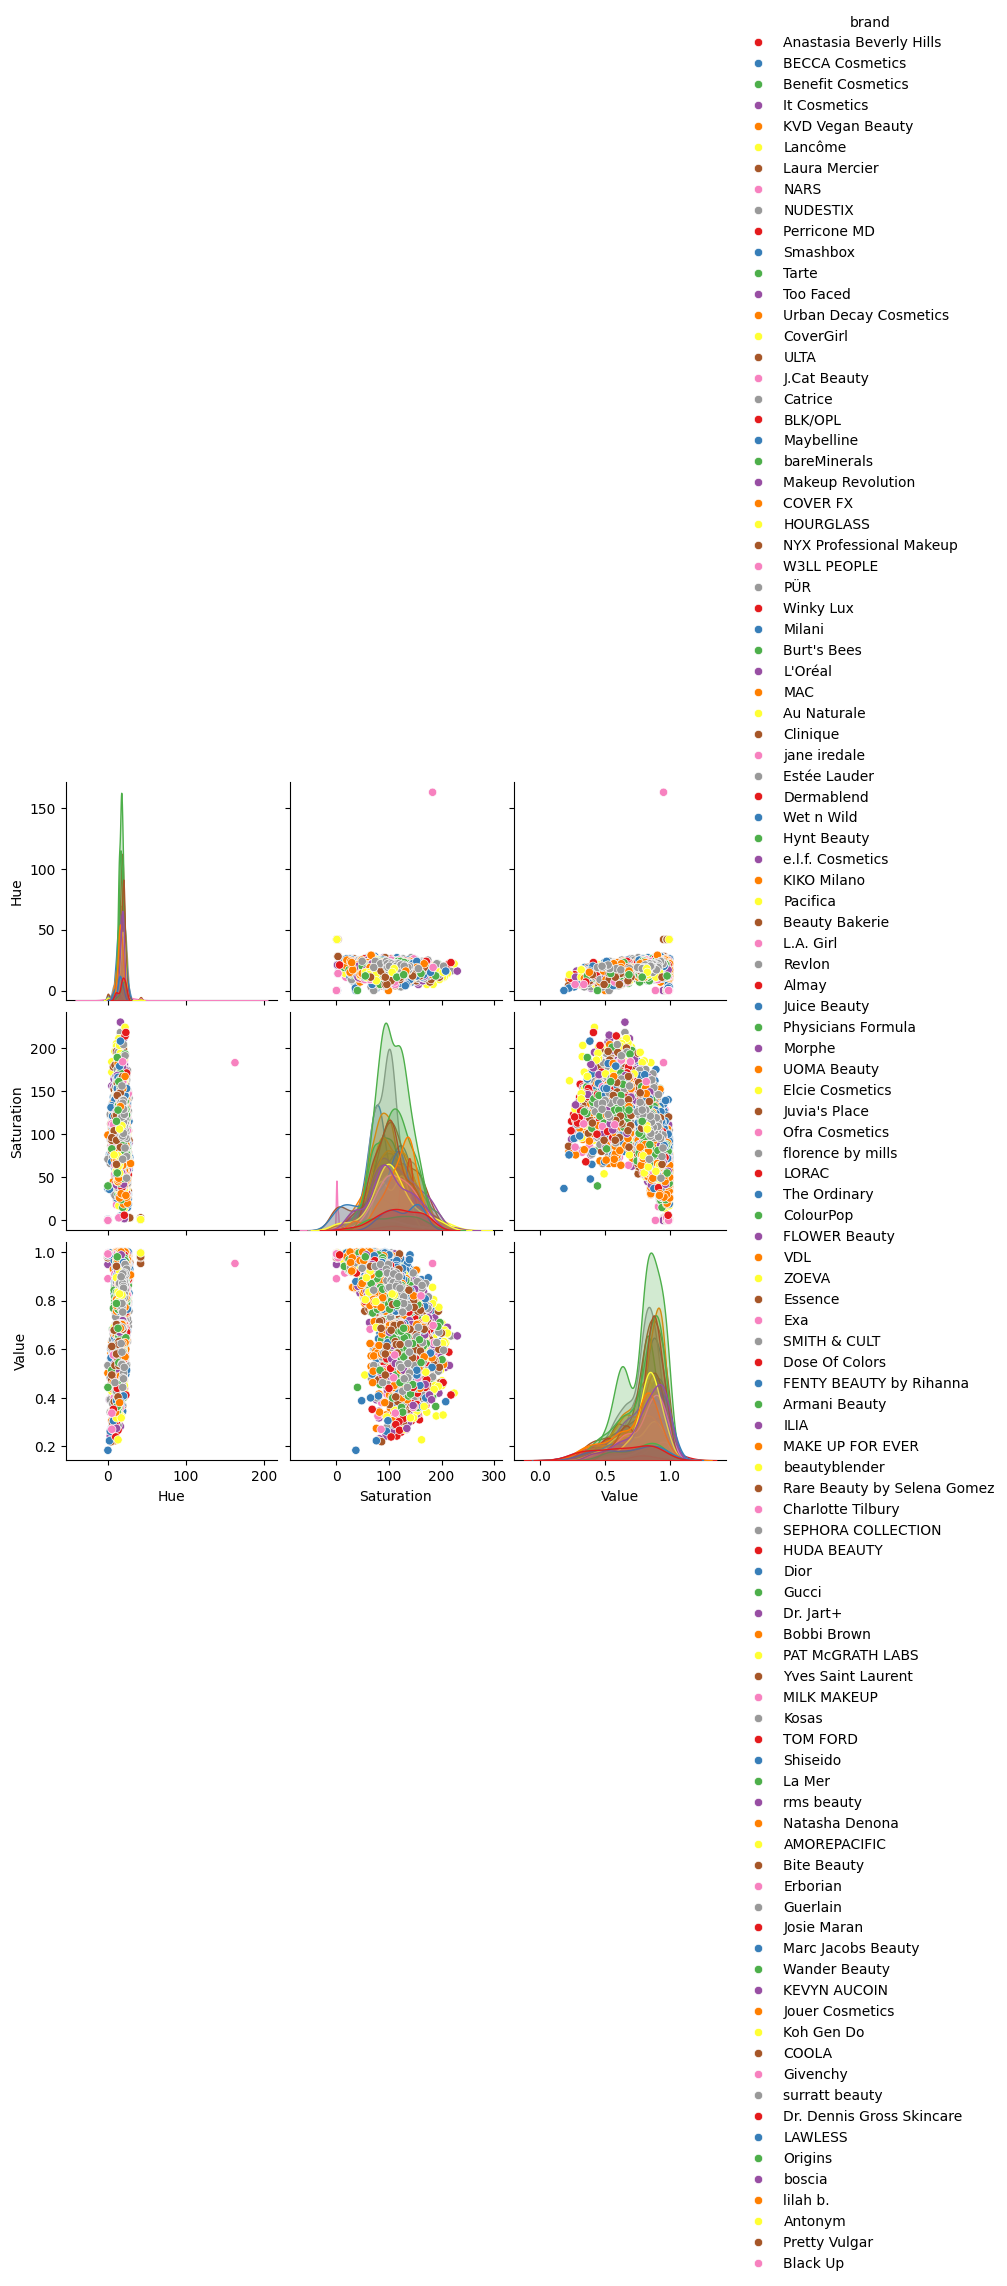

In [27]:
pair = sns.pairplot(df_foundation, hue='brand', palette='Set1')

### Maybelline Brand Data

In [52]:
df_maybelline = df_foundation[df_foundation['brand'] == 'Maybelline']
df_maybelline.head()

,brand,product,url,description,imgSrc,imgAlt,name,specific,colorspace,hex,Hue,Saturation,Value
797,Maybelline,SuperStay Full Coverage Powder Foundation,https://www.ulta.com/superstay-full-coverage-p...,Fair Porcelain selected,https://images.ulta.com/is/image/Ulta/2537771s...,Fair Porcelain,Fair Porcelain,NaN,RGB,#F5EFE6,25,15,0.960784
798,Maybelline,SuperStay Full Coverage Powder Foundation,https://www.ulta.com/superstay-full-coverage-p...,Porcelain,https://images.ulta.com/is/image/Ulta/2537777s...,Porcelain,Porcelain,NaN,RGB,#F7EEE3,23,20,0.968627
799,Maybelline,SuperStay Full Coverage Powder Foundation,https://www.ulta.com/superstay-full-coverage-p...,Natural Ivory,https://images.ulta.com/is/image/Ulta/2537775s...,Natural Ivory,Natural Ivory,NaN,RGB,#F3E6D9,21,27,0.952941
800,Maybelline,SuperStay Full Coverage Powder Foundation,https://www.ulta.com/superstay-full-coverage-p...,Classic Ivory,https://images.ulta.com/is/image/Ulta/2537780s...,Classic Ivory,Classic Ivory,NaN,RGB,#F1E6D4,26,30,0.945098
801,Maybelline,SuperStay Full Coverage Powder Foundation,https://www.ulta.com/superstay-full-coverage-p...,Buff Beige,https://images.ulta.com/is/image/Ulta/2537779s...,Buff Beige,Buff Beige,NaN,RGB,#F4E6D9,20,28,0.956863


In [53]:
df_maybelline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129 entries, 797 to 3269
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   brand        129 non-null    object 
 1   product      129 non-null    object 
 2   url          129 non-null    object 
 3   description  129 non-null    object 
 4   imgSrc       129 non-null    object 
 5   imgAlt       129 non-null    object 
 6   name         129 non-null    object 
 7   specific     63 non-null     object 
 8   colorspace   129 non-null    object 
 9   hex          129 non-null    object 
 10  Hue          129 non-null    int64  
 11  Saturation   129 non-null    int64  
 12  Value        129 non-null    float64
dtypes: float64(1), int64(2), object(10)
memory usage: 14.1+ KB


In [54]:
maybelline_count = df_maybelline['product'].unique().size
print(f"There are {maybelline_count} products of Maybelline foundation")

There are 6 products of Maybelline foundation


In [55]:
maybelline_unique = df_maybelline['product'].unique()
for i, product in enumerate(maybelline_unique):
    print(f"{i+1}. {product}")

1. SuperStay Full Coverage Powder Foundation
2. Fit Me Dewy + Smooth Foundation
3. Fit Me Matte + Poreless Liquid Foundation
4. Super Stay Full Coverage Foundation
5. Dream Urban Cover Flawless Coverage Foundation SPF 50
6. Dream Radiant Liquid Foundation


In [56]:
print(df_maybelline.isnull().sum())

brand           0
product         0
url             0
description     0
imgSrc          0
imgAlt          0
name            0
specific       66
colorspace      0
hex             0
Hue             0
Saturation      0
Value           0
dtype: int64


In [57]:
index = df_maybelline[df_maybelline['specific'].isnull()].index
pd.DataFrame(df_maybelline.loc[index])

,brand,product,url,description,imgSrc,imgAlt,name,specific,colorspace,hex,Hue,Saturation,Value
797,Maybelline,SuperStay Full Coverage Powder Foundation,https://www.ulta.com/superstay-full-coverage-p...,Fair Porcelain selected,https://images.ulta.com/is/image/Ulta/2537771s...,Fair Porcelain,Fair Porcelain,NaN,RGB,#F5EFE6,25,15,0.960784
798,Maybelline,SuperStay Full Coverage Powder Foundation,https://www.ulta.com/superstay-full-coverage-p...,Porcelain,https://images.ulta.com/is/image/Ulta/2537777s...,Porcelain,Porcelain,NaN,RGB,#F7EEE3,23,20,0.968627
799,Maybelline,SuperStay Full Coverage Powder Foundation,https://www.ulta.com/superstay-full-coverage-p...,Natural Ivory,https://images.ulta.com/is/image/Ulta/2537775s...,Natural Ivory,Natural Ivory,NaN,RGB,#F3E6D9,21,27,0.952941
800,Maybelline,SuperStay Full Coverage Powder Foundation,https://www.ulta.com/superstay-full-coverage-p...,Classic Ivory,https://images.ulta.com/is/image/Ulta/2537780s...,Classic Ivory,Classic Ivory,NaN,RGB,#F1E6D4,26,30,0.945098
801,Maybelline,SuperStay Full Coverage Powder Foundation,https://www.ulta.com/superstay-full-coverage-p...,Buff Beige,https://images.ulta.com/is/image/Ulta/2537779s...,Buff Beige,Buff Beige,NaN,RGB,#F4E6D9,20,28,0.956863
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3265,Maybelline,Dream Radiant Liquid Foundation,https://www.ulta.com/dream-radiant-liquid-foun...,Natural Beige,https://images.ulta.com/is/image/Ulta/2558053s...,Natural Beige,Natural Beige,NaN,RGB,#D9B98B,25,91,0.850980
3266,Maybelline,Dream Radiant Liquid Foundation,https://www.ulta.com/dream-radiant-liquid-foun...,Honey Beige,https://images.ulta.com/is/image/Ulta/2558034s...,Honey Beige,Honey Beige,NaN,RGB,#C39571,18,107,0.764706
3267,Maybelline,Dream Radiant Liquid Foundation,https://www.ulta.com/dream-radiant-liquid-foun...,Coconut,https://images.ulta.com/is/image/Ulta/2558026s...,Coconut,Coconut,NaN,RGB,#A97546,20,149,0.662745
3268,Maybelline,Dream Radiant Liquid Foundation,https://www.ulta.com/dream-radiant-liquid-foun...,Cocoa,https://images.ulta.com/is/image/Ulta/2558033s...,Cocoa,Cocoa,NaN,RGB,#6B4D34,19,131,0.419608


In [58]:
df_maybelline[df_maybelline['specific'].isnull()]['product'].unique()

array(['SuperStay Full Coverage Powder Foundation',
       'Fit Me Dewy + Smooth Foundation',
       'Dream Urban Cover Flawless Coverage Foundation SPF 50',
       'Dream Radiant Liquid Foundation'], dtype=object)

## Data Cleaning

From the previous data exploration, I have a clear information about the data. Turns out it has a missing value in the 'specific' column. Because 'specific' column wasn't too important, so I decided to drop it.

In [59]:
df_maybelline.drop(columns=['specific'], inplace=True)

/var/folders/sz/q7hsr2ks7kv5x7t0w0mrdr0w0000gn/T/ipykernel_73218/1814346315.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_maybelline.drop(columns=['specific'], inplace=True)


In [61]:
df_maybelline.columns

Index(['brand', 'product', 'url', 'description', 'imgSrc', 'imgAlt', 'name',
       'colorspace', 'hex', 'Hue', 'Saturation', 'Value'],
      dtype='object')

In [62]:
df_maybelline.to_csv('datasets/foundation/maybelline_new.csv', index=False)